In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix


## Example: Classifying Text

One place where (multinomial) naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. We will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [3]:
categories = ['talk.politics.guns', 'soc.religion.christian',
              'sci.space', 'sci.med', 'sci.electronics', 
              'talk.politics.mideast', 'rec.sport.baseball', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is a representative entry from the data:

In [4]:
print(train.data[10])

From: fls@keynes.econ.duke.edu (Forrest Smith)
Subject: Braves "Stoppers"
Organization: Duke University; Durham, N.C.
Lines: 22
Nntp-Posting-Host: keynes.econ.duke.edu


	The term "stopper" is generally used to refer to a pitcher, one
who can be counted on to pitch a strong game to keep his team from going
on a losing streak.

	The Braves have plenty of pitchers to fit this description,
although right now I'd expect Smoltz or Glavine to take the mantle.

	What the Braves lack, however, is an offensive stopper,
somebody they can look to to bring them out of their hitting slump.
There's just no one there.  The Braves got rid of their best pure
hitter, Lonnie Smith, and only Terry Pendleton on the current roster
has ever shown more than a cursory ability to hit.	

	Oh, and another thing that worries me.  Ron Gant seems to have
slowed down a step.  That's scary.  A slow Ron Gant doesn't have much going
for him.
-- 
@econ.duke.edu     fls@econ.duke.edu     fls@econ.duke.edu    fls@econ.duke

In order to use this data for machine learning, we need convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [5]:
#Todo, make a pipeline for TF-IDF vectorizer and multinomial naive Bayes and name it as model 
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [6]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

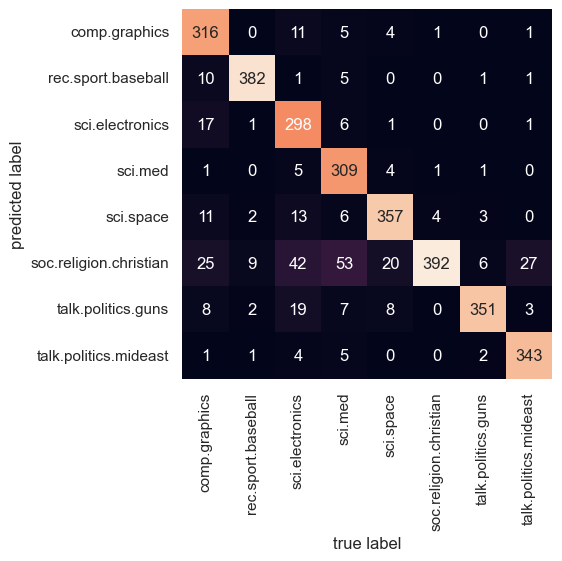

In [7]:
#Todo: generate the confusion matrix as mat for plot
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from mideast talk, but it gets confused between talk about religion and others such as mideast.

Now we have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [8]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out:

In [9]:
predict_category('sending a payload to the ISS')

'sci.space'

In [11]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [10]:
predict_category('determining the screen resolution')

'comp.graphics'